<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/TensorFlow2/Tutorial/Getting_started_TensorFlow2/Validation_regularisation_callbacks/Regularisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validation, Regularisation and Callbacks

## Coding tutorials
#### [1. Validation sets](#coding_tutorial_1)
#### [2. Model regularisation](#coding_tutorial_2)
#### [3. Introduction to callbacks](#coding_tutorial_3)
#### [4. Early stopping / patience](#coding_tutorial_4)

In [ ]:
#### Package imports ####

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import tensorflow as tf
print(tf.__version__)
        
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback, EarlyStopping

2.3.0


***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [ ]:
# Load the diabetes dataset
diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])
print("\n", diabetes_dataset.keys())

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

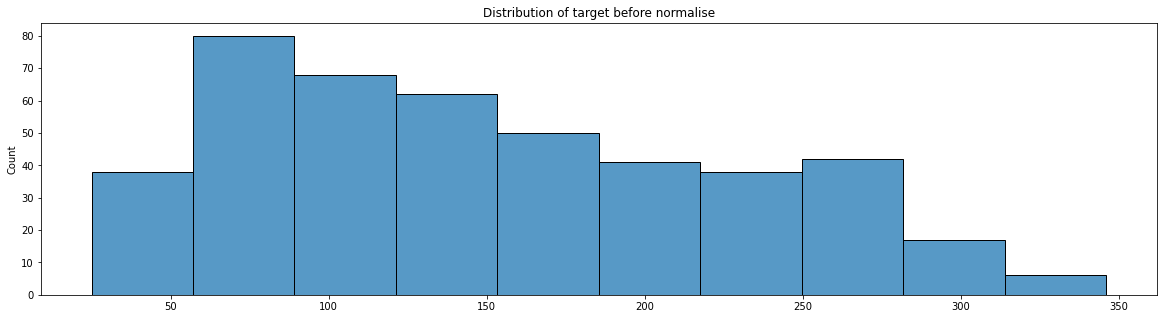

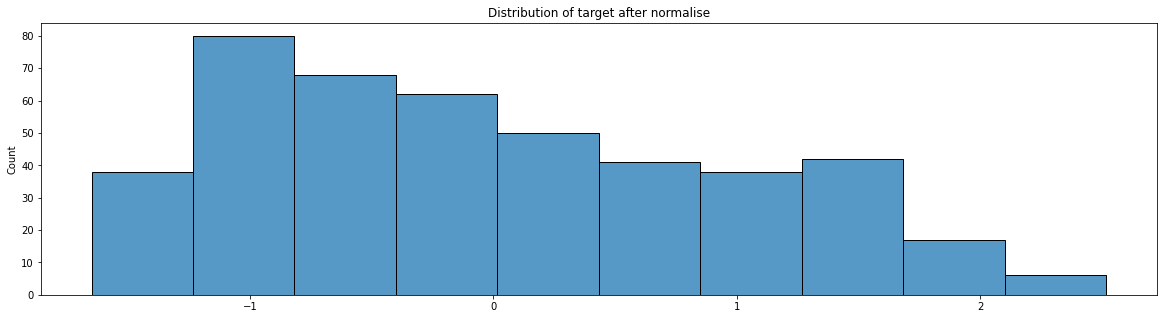

In [ ]:
# Save the input and target variables
data = diabetes_dataset["data"]
target = diabetes_dataset["target"]

fig, ax = plt.subplots(figsize=(20,5))
sns.histplot(ax=ax, data=target)
plt.title("Distribution of target before normalise")
plt.show()

# Normalise the target data will make clearer training curves
target = (target - target.mean()) / target.std()

fig, ax = plt.subplots(figsize=(20,5))
sns.histplot(ax=ax, data=target)
plt.title("Distribution of target after normalise")
plt.show()

In [ ]:
# Split the data into train and test sets
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [ ]:
# Build the model
def get_model():
    model = Sequential([
        Dense(128, activation='relu', 
            input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)])
    return model

model = get_model()

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

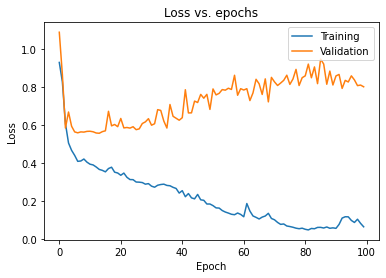

2/2 - 0s - loss: 0.8577 - mae: 0.6667


[0.8577241897583008, 0.6667376756668091]

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'])

# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_target, epochs=100,
    validation_split=0.15, batch_size=64, verbose=False)
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss vs. epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc="upper right")
plt.show()

# Evaluate the model on the test set
model.evaluate(test_data, test_target, verbose=2)

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [ ]:
# Build the model
def get_regularised_model(l1, l2, rate):
    model = Sequential([
        Dense(128, activation='relu', 
            kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2),
            bias_regularizer=regularizers.l2(l2),
            input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, activation='relu', 
            kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2),
            bias_regularizer=regularizers.l2(l2)),
        Dropout(rate),
        Dense(128, activation='relu', 
            kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2),
            bias_regularizer=regularizers.l2(l2)),
        Dropout(rate),
        Dense(128, activation='relu', 
            kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2),
            bias_regularizer=regularizers.l2(l2)),
        Dropout(rate),
        Dense(128, activation='relu', 
            kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2),
            bias_regularizer=regularizers.l2(l2)),
        Dropout(rate),
        Dense(128, activation='relu', 
            kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2),
            bias_regularizer=regularizers.l2(l2)),
        Dropout(rate),
        Dense(1)])
    return model

# Re-build the model with weight decay and dropout layers
model = get_regularised_model(l1=3e-4, l2=1e-5, rate=0.3)

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

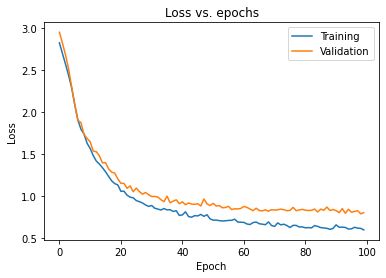

2/2 - 0s - loss: 0.9296 - mae: 0.6785


[0.9295716881752014, 0.6784543991088867]

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'])

# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_target, epochs=100,
    validation_split=0.15, batch_size=64, verbose=False)
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss vs. epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc="upper right")
plt.show()

# Evaluate the model on the test set
model.evaluate(test_data, test_target, verbose=2)

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [ ]:
# Write a custom callback
class TrainingCallback(Callback):
    
    def on_train_begin(self, logs=None):
        print("Starting training....")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Starting batch {batch}")
        
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}")
        
    def on_epoch_end(self, epoch, logs=None):
        print(f"Finished epoch {epoch}")
        
    def on_train_end(self, logs=None):
        print("Finished training!")
        
# Re-build the model
model = get_regularised_model(l1=3e-4, l2=1e-5, rate=0.3)

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'])

# Train the model with the callback
model.fit(train_data, train_target, epochs=3, batch_size=128,
    verbose=False, callbacks=[TrainingCallback()])

Starting training....
Starting epoch 0
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 0
Starting epoch 1
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 1
Starting epoch 2
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 2
Finished training!


In [ ]:
# Write a custom callback
class TestingCallback(Callback):
    
    def on_test_begin(self, logs=None):
        print("Starting testing....")
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing: Starting batch {batch}")
        
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing: Finished batch {batch}")
        
    def on_test_end(self, logs=None):
        print("Finished testing!")
        
# Evaluate the model
model.evaluate(test_data, test_target, verbose=False,
    callbacks=[TestingCallback()])

Starting testing....
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
Finished testing!


[2.85793399810791, 0.9766377210617065]

In [ ]:
# Write a custom callback
class PredictionCallback(Callback):
    
    def on_predict_begin(self, logs=None):
        print("Starting prediction...")
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction: Starting batch {batch}")
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction: Finished batch {batch}")
        
    def on_predict_end(self, logs=None):
        print("Finished prediction!")
        
# Make predictions with the model
model.predict(test_data, verbose=False, 
    callbacks=[PredictionCallback()])

Starting prediction...
Prediction: Starting batch 0
Prediction: Finished batch 0
Prediction: Starting batch 1
Prediction: Finished batch 1
Finished prediction!


array([[ 0.079643  ],
       [ 0.09545845],
       [ 0.08527519],
       [ 0.0687821 ],
       [ 0.07400074],
       [ 0.06265103],
       [ 0.03146616],
       [ 0.05631804],
       [ 0.07499036],
       [ 0.09024923],
       [ 0.07958161],
       [-0.00645809],
       [ 0.11299005],
       [ 0.07079986],
       [ 0.06986285],
       [ 0.08650937],
       [ 0.12446415],
       [ 0.08417393],
       [-0.00469402],
       [ 0.05053021],
       [ 0.09383311],
       [ 0.07927956],
       [ 0.05113357],
       [ 0.04478163],
       [ 0.11843307],
       [ 0.04496048],
       [-0.0027866 ],
       [ 0.07806625],
       [ 0.10397156],
       [ 0.08162671],
       [-0.01384097],
       [ 0.05283517],
       [ 0.03234737],
       [ 0.13730516],
       [ 0.04700422],
       [-0.01146705],
       [ 0.03953916],
       [ 0.0724186 ],
       [ 0.05365843],
       [ 0.0046098 ],
       [ 0.0690291 ],
       [-0.00349865],
       [ 0.06055015],
       [-0.00475267],
       [-0.00323217]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [ ]:
# Re-train the unregularised model
unregularised_model = get_model()
unregularised_model.compile(optimizer='adam', 
    loss='mse', metrics=['mae'])
unreg_history = unregularised_model.fit(train_data, train_target,
    epochs=100, validation_split=0.15, batch_size=64, verbose=False,
    callbacks=[EarlyStopping(monitor='val_loss', patience=2, 
         min_delta=0.001)])

# Evaluate the model on the test set
unregularised_model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.9630 - mae: 0.8021


[0.9630253911018372, 0.8021224737167358]

In [ ]:
# Re-train the regularised model
regularised_model = get_regularised_model(l1=3e-4, l2=1e-5, rate=0.3)
regularised_model.compile(optimizer='adam', 
    loss='mse', metrics=['mae'])
reg_history = regularised_model.fit(train_data, train_target,
    epochs=100, validation_split=0.15, batch_size=64, verbose=False,
    callbacks=[EarlyStopping(monitor='val_loss', patience=2, 
         min_delta=0.001)])

# Evaluate the model on the test set
regularised_model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 1.0259 - mae: 0.6913


[1.0259044170379639, 0.6913084387779236]

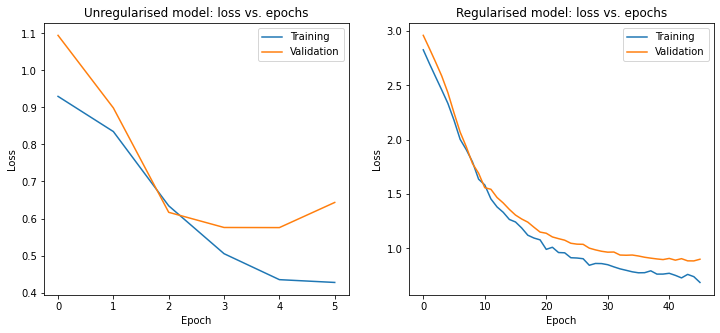

In [ ]:
# Plot the training and validation loss
fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)
plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()